# Clustering.

Consiste en encontrar una manera de dividir los datos en grupos(clusters). Los puntos del mismo punto son 'similares'.<br>
Su salida es una pertenencia a cluster para cada punto.

## Clustering K-means.

1. Escoger un número de k-clusters a encontrar.
2. Asignar cada dato al centro del cluster más cercano.
3. Actualizar cada centro de cluster.
4. Repetir 2 y 3 hasta que se tengan centros estables.

Trabaja bien para clusters simples, con el mismo tamaño y bien separados. Con clusters complejos no trabaja bien.

<IPython.core.display.Javascript object>


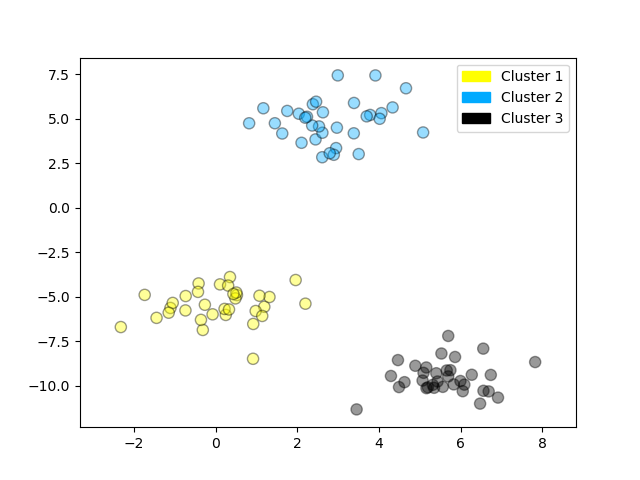

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
import warnings
warnings.filterwarnings('ignore')

X,y=make_blobs(random_state=10)

kmeans=KMeans(n_clusters=3).fit(X)

plot_labelled_scatter(X,kmeans.labels_,['Cluster 1','Cluster 2','Cluster 3'])

Probemos ahora con fruits dataset:

<IPython.core.display.Javascript object>


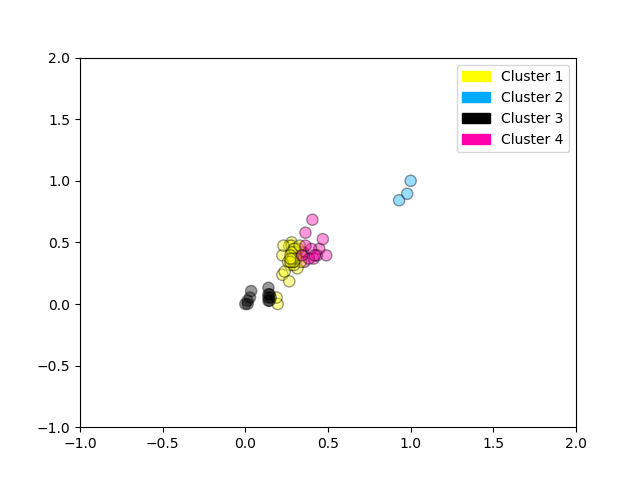

In [2]:
from sklearn.preprocessing import MinMaxScaler

fruits=pd.read_table('fruit_data_with_colors.txt')
X_fruits=fruits[['mass','width','height','color_score']].as_matrix()
y_fruits=fruits['fruit_label']-1

X_fruits_normalized=MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_fruits)

plot_labelled_scatter(X_fruits_normalized,kmeans.labels_,['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

## Clustering aglomerativo.

Existen tres métodos en este tipo de clustering:<br>
* Método de ward: Menos crecimiento en varianza total.
* Enlace aproximado: Distancia media entre clusters.
* Enlace completo: Máxima distancia entre clusters.

<a href="https://imgur.com/vdbYjlT"><img src="https://i.imgur.com/vdbYjlT.png" title="source: imgur.com" /></a>

<IPython.core.display.Javascript object>


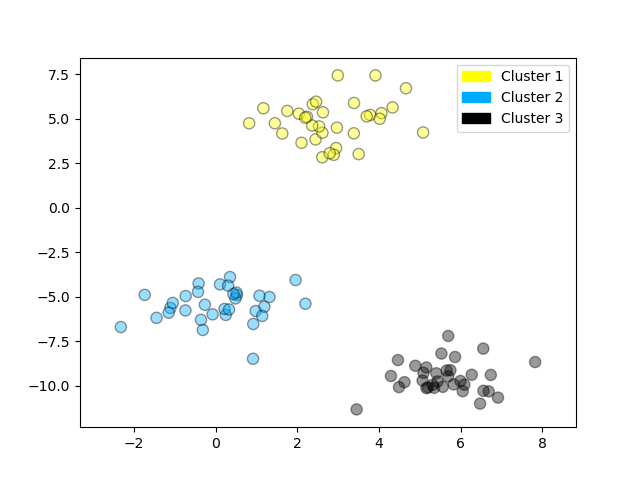

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X,y=make_blobs(random_state=10)

cls=AgglomerativeClustering(n_clusters=3)
cls_assig=cls.fit_predict(X)

plot_labelled_scatter(X,cls_assig,['Cluster 1','Cluster 2','Cluster 3'])

Probemos ahora con fuits dataset:

<IPython.core.display.Javascript object>


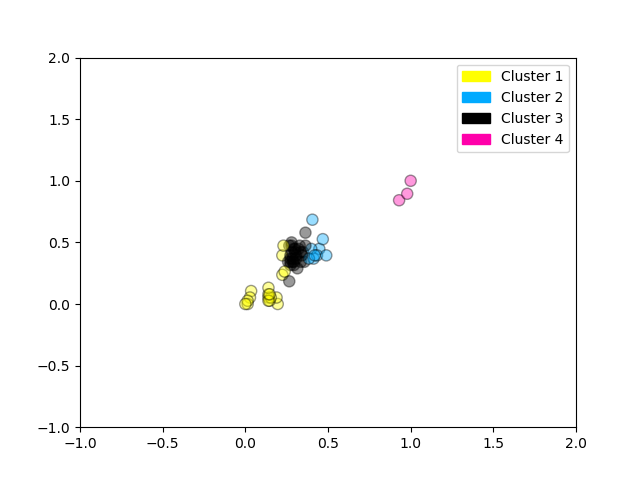

In [4]:
from sklearn.preprocessing import MinMaxScaler

fruits=pd.read_table('fruit_data_with_colors.txt')
X_fruits=fruits[['mass','width','height','color_score']].as_matrix()
y_fruits=fruits['fruit_label']-1

X_fruits_normalized=MinMaxScaler().fit(X_fruits).transform(X_fruits)  

cls=AgglomerativeClustering(n_clusters=4)
cls.fit(X_fruits)

plot_labelled_scatter(X_fruits_normalized,cls.labels_,['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

## Clustering Heredado.

<a href="https://imgur.com/NaNFgiX"><img src="https://i.imgur.com/NaNFgiX.png" title="source: imgur.com" /></a>

In [5]:
from scipy.cluster.hierarchy import ward,dendrogram
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

<IPython.core.display.Javascript object>


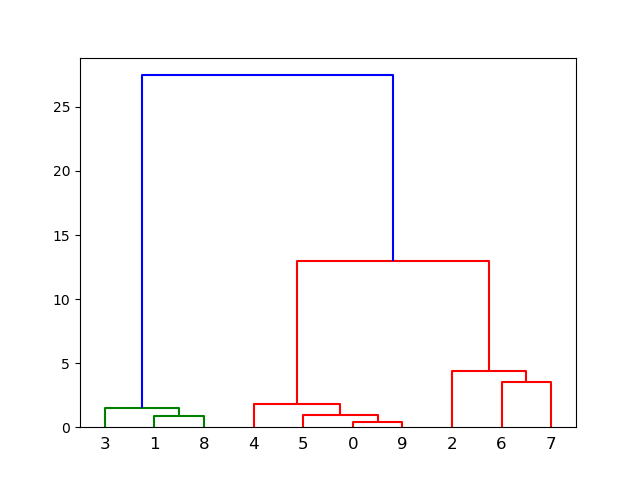

In [6]:
X,y=make_blobs(random_state=10,n_samples=10)

plt.figure()
dendrogram(ward(X))
plt.show()

## Clustering DBSCAN.

No se necesita especificar el número de clusters.<br>
Tiene una eficiencia relativa.<br>
Identifica parámetros de ruido.<br>

Valores del clusters: [ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


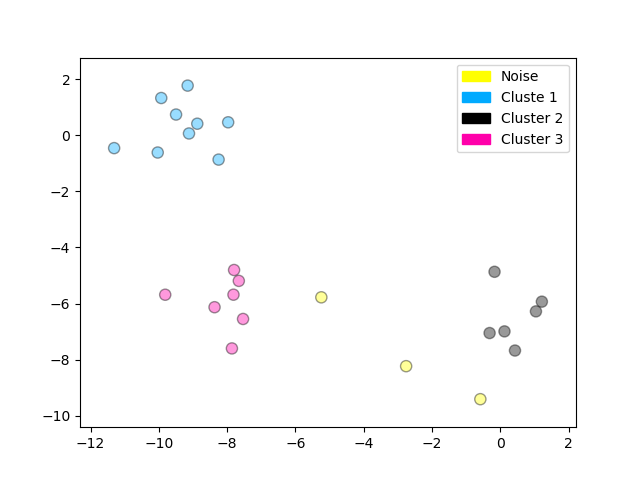

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=9,n_samples=25)

dbscan=DBSCAN(eps=2,min_samples=2)
cls=dbscan.fit_predict(X)

print('Valores del clusters: {}'.format(cls))

plot_labelled_scatter(X,cls+1,['Noise','Cluste 1','Cluster 2','Cluster 3'])

Valores del clusters: [ 0  1  0 -1  1  2  2  2  1]


<IPython.core.display.Javascript object>


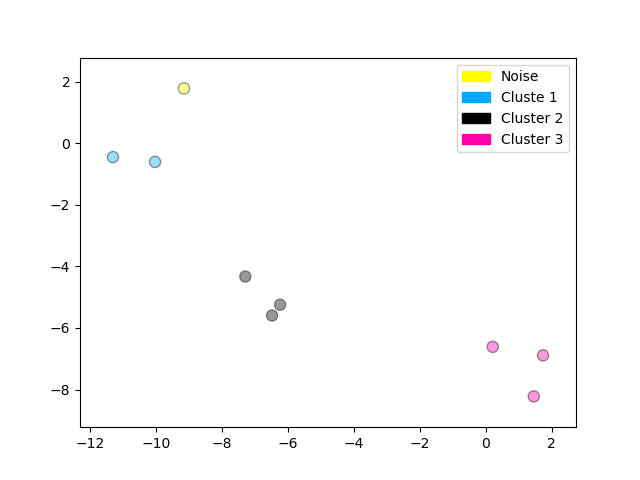

In [8]:
X,y=make_blobs(random_state=9,n_samples=9)

dbscan=DBSCAN(eps=2,min_samples=2)
cls=dbscan.fit_predict(X)

print('Valores del clusters: {}'.format(cls))

plot_labelled_scatter(X,cls+1,['Noise','Cluste 1','Cluster 2','Cluster 3'])